<a href="https://colab.research.google.com/github/akhundMurad/MachineLearning/blob/main/practice/BostonHousingRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Boston Housing Regression. House Price Prediction.





## 1. Preparation

#### 1.1 Load Boston housing dataset.

In [1]:
from tensorflow.keras.datasets import boston_housing


(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()
print(train_data.shape, test_data.shape)

57026/57026 [==============================] - 0s 1us/step
(404, 13) (102, 13)


#### 1.2 Prepare data.

In [2]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

train_data

array([[-0.27224633, -0.48361547, -0.43576161, ...,  1.14850044,
         0.44807713,  0.8252202 ],
       [-0.40342651,  2.99178419, -1.33391162, ..., -1.71818909,
         0.43190599, -1.32920239],
       [ 0.1249402 , -0.48361547,  1.0283258 , ...,  0.78447637,
         0.22061726, -1.30850006],
       ...,
       [-0.40202987,  0.99079651, -0.7415148 , ..., -0.71712291,
         0.07943894, -0.67776904],
       [-0.17292018, -0.48361547,  1.24588095, ..., -1.71818909,
        -0.98764362,  0.42083466],
       [-0.40422614,  2.04394792, -1.20161456, ..., -1.30866202,
         0.23317118, -1.15392266]])

## 2. Model building.

#### 2.1 Build model architecture.

Notes:
- Using 3 Dense layers.
- This task is classified as the scalar linear regression. Therefore, the last layer is Dense without an activation function.
- Using the `Mean Square Error` as a loss function.
- Using the `Mean Absolute Error` as a metric for validation process.

In [3]:
from tensorflow import keras
from tensorflow.keras import layers


def build_model():
    model = keras.Sequential(
        [
            layers.Dense(64, activation="relu"),
            layers.Dense(64, activation="relu"),
            layers.Dense(1),
        ]
    )
    model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
    return model

## 3. Solution evalution.

#### 3.1 K-fold cross-validation.

In [4]:
import numpy as np


k = 4
num_val_samples = len(train_data) // k
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [
            train_data[:i * num_val_samples],
            train_data[(i + 1) * num_val_samples:]
        ],
        axis=0
    )
    partial_train_targets = np.concatenate(
        [
            train_targets[:i * num_val_samples],
            train_targets[(i + 1) * num_val_samples:]
        ],
        axis=0
    )
    model = build_model()
    history = model.fit(
        partial_train_data,
        partial_train_targets,
        validation_data=(val_data, val_targets),
        epochs=num_epochs,
        batch_size=16,
        verbose=0,
    )
    all_mae_histories.append(history.history["val_mae"])

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


#### 3.2 Visualization.

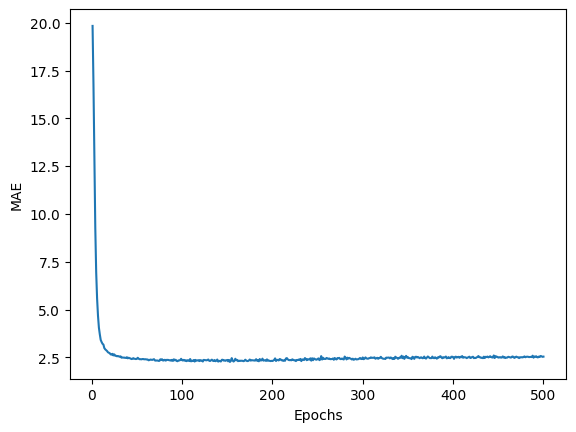

In [11]:
import matplotlib.pyplot as plt


average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)
]

plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel("Epochs")
plt.ylabel("MAE")
plt.show()

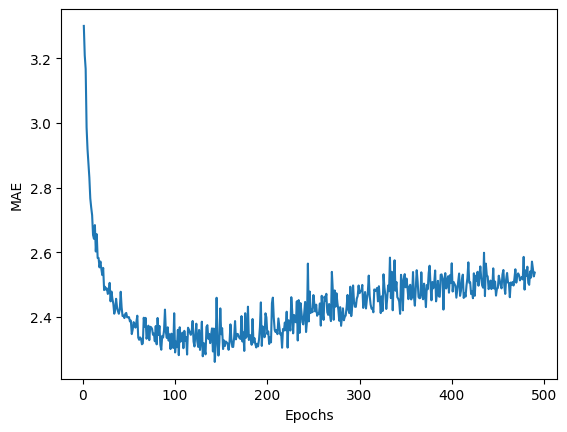

In [12]:
truncated_mean_history = average_mae_history[10:]
plt.plot(range(1, len(truncated_mean_history) + 1), truncated_mean_history)
plt.xlabel("Epochs")
plt.ylabel("MAE")
plt.show()

#### 3.3 Final model training

In [13]:
model = build_model()
model.fit(train_data, train_targets, epochs=130, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)
print(test_mse_score, test_mae_score)

4/4 [==============================] - 0s 4ms/step - loss: 13.9677 - mae: 2.5821
13.967695236206055 2.5820584297180176
